In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
def visualize_noise(z, method='scatter'):
    """
    Visualizes the noise vector z.

    Parameters:
        z (torch.Tensor): The noise vector to visualize.
        method (str): The visualization method, 'scatter' or 'histogram'.
    """
    z = z.cpu().detach().numpy()

    if method == 'scatter':
        if z.shape[1] > 2:
            print("Scatter plot is best used with 2D noise vectors. Try using 'histogram' for higher dimensions.")
        else:
            plt.scatter(z[:, 0], z[:, 1], alpha=0.5)
            plt.title("Scatter Plot of Noise Vector z")
            plt.xlabel("z[0]")
            plt.ylabel("z[1]")
            plt.grid(True)
            plt.show()

    elif method == 'histogram':
        plt.hist(z.flatten(), bins=50, alpha=0.7, color='blue')
        plt.title("Histogram of Noise Vector z")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    else:
        print("Invalid method. Use 'scatter' or 'histogram'.")


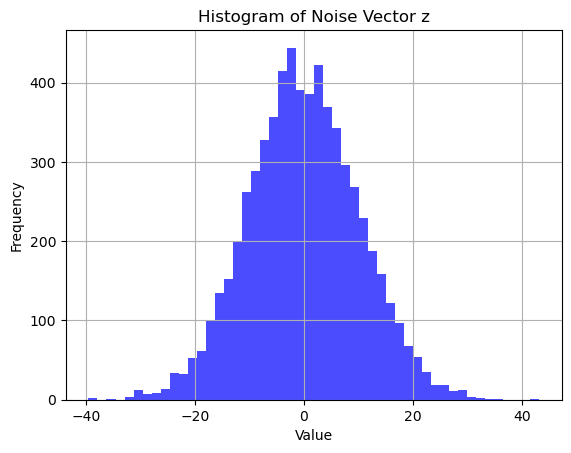

In [40]:


device = torch.device('cpu')

# Configuration for W&B
latent_size = 64
hidden_size = 256
image_size = 784
batch_size = 100
learning_rate = 0.0002
num_epochs = 200
noise_mean = 0.0  # Mean of the noise
noise_std = 10.0   # Standard deviation of the noise


# Example usage:
z = torch.randn(batch_size, latent_size).to(device) * noise_std + noise_mean
visualize_noise(z, method='histogram')


In [41]:
z[:1]

tensor([[ -1.1014,  -0.3238,   9.7413,   1.3322,  31.7848,  11.2715,  -3.4262,
         -16.1867,  11.7640,  -1.1577,  -1.9298,  -6.5645,   6.0403,   4.3870,
          -7.1727, -18.4499,   0.9741,   5.1015,  -8.1470, -24.8035, -12.2201,
          -4.6907,  -2.0819,   0.3045,  -3.4174, -10.0939,  10.7783,  -2.3065,
           4.9555,  -8.7392,  15.2857,  15.8570,   5.4450,  13.3888,   0.2167,
           3.7933,  -2.3388,  -2.1907,  -3.0756,  -4.5295,   1.1683,   2.3004,
          -1.1749,   6.7977,  16.1505,   1.1095,   9.0502,  -6.9614,  -6.6066,
           4.1527,   0.7365,  -0.8556,   3.9765,   5.2613,  -8.2912,   6.2001,
           2.3474,   3.0703,  -5.1648,  -6.7930,  12.6156,   8.7487,   4.8338,
           1.7758]])

In [29]:
z[:2].shape

torch.Size([2, 64])

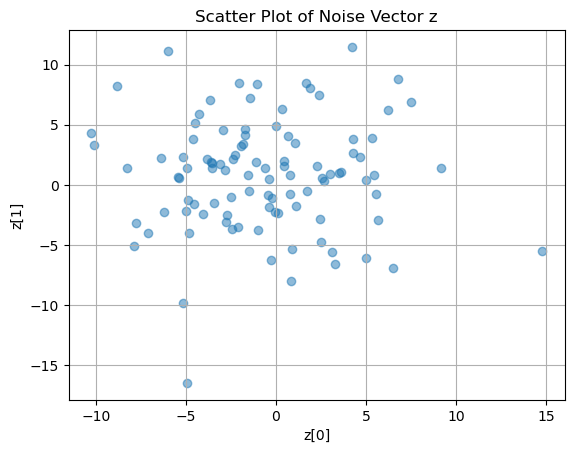

In [38]:


plt.scatter(z[:, 0], z[:, 1], alpha=0.5)
plt.title("Scatter Plot of Noise Vector z")
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.grid(True)
plt.show()

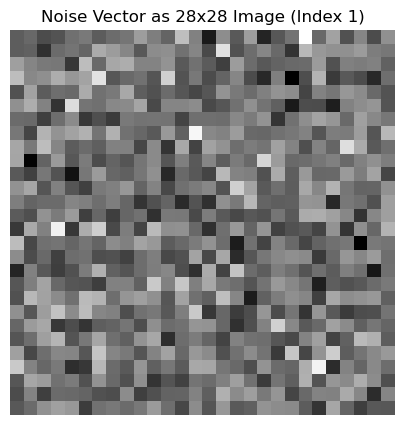

tensor([-2.8894e+00, -1.5524e+00, -5.1558e+00, -4.2626e+00, -5.4603e-01,
         6.4660e-01, -3.1337e+00, -1.0468e+00,  1.9073e-01,  5.2876e+00,
         1.2743e+00, -1.9978e+00,  9.4881e+00,  1.7403e+00, -1.1617e+01,
         3.2584e+00, -3.4293e+00,  5.2683e+00, -1.0219e+01, -3.7611e+00,
        -1.0854e-01,  1.7974e+01, -1.4361e+00,  5.9499e+00, -4.4767e+00,
         2.3959e+00, -5.0931e+00,  3.6185e+00, -2.9984e+00, -2.2456e+00,
        -8.7474e+00, -1.1072e+00,  2.5480e-02, -1.9604e+00,  7.0346e+00,
         5.2035e+00,  2.3717e+00, -3.5426e+00,  3.1104e+00,  3.4592e+00,
        -3.5023e-01,  2.2182e+00, -5.5569e+00,  1.3993e+01, -4.3632e+00,
        -9.3169e-01,  2.3587e+00, -1.2070e+00, -8.3406e+00,  8.7951e+00,
         4.6245e+00,  3.7465e+00,  3.6722e+00,  5.0717e+00,  1.1869e+00,
         4.6086e-01,  5.5553e+00,  2.2070e+00,  6.0290e-01,  4.6497e-01,
        -7.8140e+00,  9.3652e+00, -1.2822e+00,  6.5516e+00,  7.4040e+00,
         1.9872e+00,  2.0380e+00,  4.0876e+00, -3.2

In [39]:
def visualize_noise_as_image(z, index=0):
    """
    Visualizes a single noise vector as a 28x28 grayscale image.

    Parameters:
        z (torch.Tensor): The noise vector to visualize, expected shape (batch_size, latent_size).
        index (int): The index of the noise vector in the batch to visualize.
    """
    # Extract the specific noise vector and reshape it to 28x28
    noise_image = z[index].reshape(28, 28).cpu().detach().numpy()

    # Display the noise as an image
    plt.figure(figsize=(5, 5))
    plt.imshow(noise_image, cmap='gray')
    plt.title(f"Noise Vector as 28x28 Image (Index {index})")
    plt.axis('off')
    plt.show()

# Example usage:
z = torch.randn(batch_size, image_size).to(device) * noise_std + noise_mean

index_ = 1 
visualize_noise_as_image(z, index=index_)

print(z[index_])
